In [1]:
from storage_calculator import *

#### Загружаем файл с ценами и средними стоимостями

In [2]:
input_file = pd.read_csv('input.txt', sep=';')

In [3]:
input_file

,Позиция,Цена
0,Цена рохли,23000.00
1,Цена погрузчика с вилкой 2200мм,1600000.00
2,Цена погрузчика с вилкой 5000мм,2000000.00
3,Цена погрузчика с вилкой 6000мм,2100000.00
4,Цена высотного погрузчика,2500000.00
5,Цена штабелёра с вилкой 2200мм,500000.00
6,Цена штабелёра с вилкой 5000мм,900000.00
7,Цена штабелёра с вилкой 6000мм,1000000.00
8,Цена первого яруса стеллажа (пол+1) за секцию,24000.00
9,"Доп. расходы на стеллаж за секцию (монтаж, отб...",1875.00


#### Создаём объект класса StorageCalaculator и проводим расчёт стоимости оборудования и содержания

In [4]:
calc = StorageCalculator(input_file, s=1000, height=15)

In [5]:
df = calc.annual_cost()

In [6]:
df

,Количество ярусов,Количество палетомест,Количество единиц техники,Тип техники,Количество дополнительных рохлей,Стоимость палетоместа при покупке (руб.),Возможный товарооборот (т/год),Возможный товарооборот (куб. м/год),Требуемое количество ПШЕ,Расходы на персонал (руб/пм в год),Стоимость приобретения (руб/пм в год) (горизонт 5 лет),Стоимость обслуживания (руб/пм в год),Годовая стоимость за пм,Общая годовая стоимость (млн. руб)
0,1,600.0,2,рохля,1,115,3009.6,9576.0,3,4500.00,23.0,6600.0,11123.00,6.6738
1,2,660.0,2,штабелёр,1,5862,6019.2,10533.6,3,4090.91,1172.4,6000.0,11263.31,7.4338
2,3,990.0,2,штабелёр,2,6740,9028.8,15800.4,4,3636.36,1348.0,4000.0,8984.36,8.8945
3,4,1320.0,2,штабелёр,3,6724,12038.4,21067.2,5,3409.09,1344.8,3000.0,7753.89,10.2351
4,5,1650.0,2,погрузчик,6,8439,18057.6,26334.0,7,3818.18,1687.8,2400.0,7905.98,13.0449


#### Так же уже встроена функция визуализации ключевых результатов (имеется возможность сохранить результат в виде картинки)

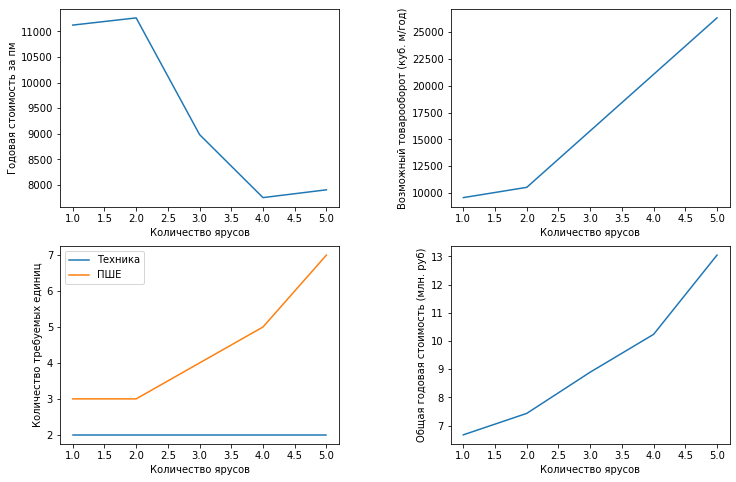

In [7]:
visualization(df)

#### Дополнительно реализована функция поиска оптимальной площади (для поиска нового помещения при заданной технике/стеллажах) (расчёт для 5 уровней хранения)

In [8]:
list_of_areas = np.linspace(60, 5500, 1000)

In [9]:
df1, df2, df3, df4, df5 = optimal_area_per_level(input_file, list_of_areas, height=999)

In [10]:
df1

,Количество ярусов,Площадь,Количество палетомест,Количество единиц техники,Тип техники,Количество дополнительных рохлей,Стоимость палетоместа при покупке (руб.),Возможный товарооборот (т/год),Возможный товарооборот (куб. м/год),Требуемое количество ПШЕ,Расходы на персонал (руб/пм в год),Стоимость приобретения (руб/пм в год) (горизонт 5 лет),Стоимость обслуживания (руб/пм в год),Годовая стоимость за пм,Общая годовая стоимость (млн. руб)
0,1,60.000000,36.000000,1.0,рохля,0.0,639,164.16,574.560000,1,25000.00,127.8,6600.0,31727.80,1.1422
1,1,65.445445,39.267267,1.0,рохля,0.0,586,191.52,626.705586,1,22919.85,117.2,6600.0,29637.05,1.1638
2,1,70.890891,42.534535,1.0,рохля,0.0,541,191.52,678.851171,1,21159.28,108.2,6600.0,27867.48,1.1853
3,1,76.336336,45.801802,1.0,рохля,0.0,502,218.88,730.996757,1,19649.88,100.4,6600.0,26350.28,1.2069
4,1,81.781782,49.069069,1.0,рохля,0.0,469,218.88,783.142342,1,18341.49,93.8,6600.0,25035.29,1.2285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,5478.218218,3286.930931,10.0,рохля,3.0,91,16470.72,52459.417658,13,3559.55,18.2,6600.0,10177.75,33.4536
996,1,5483.663664,3290.198198,10.0,рохля,3.0,91,16498.08,52511.563243,13,3556.02,18.2,6600.0,10174.22,33.4752
997,1,5489.109109,3293.465465,10.0,рохля,3.0,91,16498.08,52563.708829,13,3552.49,18.2,6600.0,10170.69,33.4968
998,1,5494.554555,3296.732733,10.0,рохля,3.0,91,16525.44,52615.854414,13,3548.97,18.2,6600.0,10167.17,33.5184


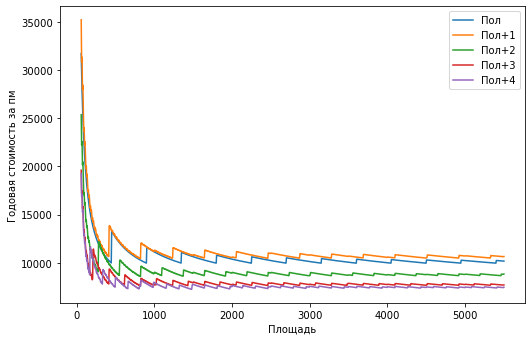

In [11]:
visualization_area(input_file, list_of_areas, height=20, save=0)